#1. Import Libraries

In [ ]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#2. Importing The Dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Load the dataset
df = pd.read_csv('/content/drive/MyDrive/Crista_Spices/CristaSpices_ReviewsData.csv')

In [ ]:
# Visualizing the dataset
df.head()

,product_name,product_type,rating,title,review_text
0,Tingly Sichuan Peppercorn Seeds,whole spices,5.0,Good quality,Very good aroma. Gives a tingling taste and mi...
1,Tingly Sichuan Peppercorn Seeds,whole spices,5.0,aromatic and tingling flavour...,These sichuan peppercorns are really good in t...
2,Tingly Sichuan Peppercorn Seeds,whole spices,1.0,SCAMMED SHAM- IT IS NOT SICHUAN PEPPER !!!!,IT DOESN'T EVEN HAS ANY HINT OF REGULAR PEPPER...
3,Tingly Sichuan Peppercorn Seeds,whole spices,5.0,Impressed,Very Highly impressed by such a good quality p...
4,Tingly Sichuan Peppercorn Seeds,whole spices,4.0,Distinct flavour!!!,"Sichuan peppercorn has distinct flavour, mildl..."


#3. Exploratory Data Analysis

Shuffling The Entire Dataset

In [ ]:
# Shuffling the entire dataset
df_data=df.sample(frac=1)

In [ ]:
# Visualizing the dataset after shuffling
df_data.head()

,product_name,product_type,rating,title,review_text
721,Roman Cacio e Pepe Seasoning,international seasoning,5.0,Mama Mia!! Truly authentic,Was teleported to bologna… loved this such an ...
557,American Barbeque Spice Rub,international seasoning,4.0,Mouth watering taste,Mouth watering taste... good for seasoning and...
516,Zesty Chilli Lime Seasoning,international seasoning,5.0,Exceeded expectations!,It tastes amazinggggg on almost everything lik...
272,Kashmiri Chilli Powder,ground spices,5.0,Better quality product,"I was using different brands chilly powder,but..."
697,Italian Pizza Seasoning,international seasoning,5.0,Highly Recommended!,Convenient to use bottle; excellent taste and ...


Statistical Analysis

In [ ]:
df_data.describe()

,rating
count,786.000000
mean,4.501272
std,1.135697
min,1.000000
25%,5.000000
50%,5.000000
75%,5.000000
max,5.000000


In [ ]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 786 entries, 721 to 648
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   product_name  786 non-null    object 
 1   product_type  786 non-null    object 
 2   rating        786 non-null    float64
 3   title         786 non-null    object 
 4   review_text   782 non-null    object 
dtypes: float64(1), object(4)
memory usage: 36.8+ KB


In [ ]:
df_data.isnull().sum()

product_name    0
product_type    0
rating          0
title           0
review_text     4
dtype: int64

In [ ]:
rows_with_missing_values = df_data[df_data.isnull().any(axis=1)]
rows_with_missing_values

,product_name,product_type,rating,title,review_text
178,Hing Powder,ground spices,1.0,Including package the weight is 100gms,NaN
447,Zesty Chilli Lime Seasoning,international seasoning,5.0,"Best seasoning in the market, great to sprinkl...",NaN
680,Classic Italian Seasoning,international seasoning,5.0,"Nice product , you can go for it 😊",NaN
389,Smoky Tandoori Masala Spice Mix,indian spices,5.0,Authentic Flavours,NaN


In [ ]:
df_data.duplicated().sum()

1

In [ ]:
duplicates = df_data[df_data.duplicated(keep=False)]
duplicates

,product_name,product_type,rating,title,review_text
207,Hing Powder,ground spices,5.0,Nice smell,The quality of this hing is very good. No adde...
158,Hing Powder,ground spices,5.0,Nice smell,The quality of this hing is very good. No adde...


In [ ]:
df_data.shape

(786, 5)

Cleaning Dataset

In [ ]:
# Imputation Missing Values
df_data['review_text'].fillna(value=df_data['title'], inplace=True)

In [ ]:
df_data.isnull().sum()

product_name    0
product_type    0
rating          0
title           0
review_text     0
dtype: int64

In [ ]:
# Dropping Duplicates Data
df_data.drop_duplicates(inplace=True)

In [ ]:
df_data.duplicated().sum()

0

In [ ]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 785 entries, 721 to 648
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   product_name  785 non-null    object 
 1   product_type  785 non-null    object 
 2   rating        785 non-null    float64
 3   title         785 non-null    object 
 4   review_text   785 non-null    object 
dtypes: float64(1), object(4)
memory usage: 36.8+ KB


In [ ]:
# Save the processed file for future use
from google.colab import files
path_to_save = '/content/drive/My Drive/Crista_Spices/NewCristaSpices_ReviewsData.csv'
df_data.to_csv(path_to_save, index=False)

In [ ]:
df_data.shape

(785, 5)

In [ ]:
# Install necessary packages
!pip install googletrans==4.0.0-rc1
!pip install nltk

# Import libraries and download NLTK resources
import nltk

# Download the necessary NLTK resources
nltk.download('wordnet')
nltk.download('omw-1.4')

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.1/55.1 kB 3.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 29.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.4/133.4 kB 16.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 7.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 4.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.6/53.6 kB 6.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.0/65.0 kB 5.1 MB/s eta 0:00:00
  Created wheel for googletrans: filename=googletrans-4.0.0rc1-py3-none-any.whl size=17395 sha256=fa85510cfad1a9bfe0e394f5ba0b2acd872a22743b7621002b2b43c50ce79c15
  Stored in directory: /root/.cache/pip/wheels/c0/59/9f/7372f0cf70160fe61b528532e1a7c8498c4becd6bcffb022de
Successfully built googletrans
  Attempting uninstall: chardet
    Found existing installation: chardet 5.2.0
    Uninstalling 

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [ ]:
import random
from nltk.corpus import wordnet
from googletrans import Translator

Data Augmentation

In [ ]:
# Load the dataset
df = pd.read_csv('/content/drive/My Drive/Crista_Spices/NewCristaSpices_ReviewsData.csv')

In [ ]:
# Function for synonym replacement
def synonym_replacement(sentence, n):
    words = sentence.split()
    new_words = words.copy()
    random_word_list = list(set([word for word in words if wordnet.synsets(word)]))
    random.shuffle(random_word_list)
    num_replaced = 0
    for random_word in random_word_list:
        synonyms = wordnet.synsets(random_word)
        if len(synonyms) >= 1:
            synonym = synonyms[0].lemmas()[0].name()
            new_words = [synonym if word == random_word else word for word in new_words]
            num_replaced += 1
        if num_replaced >= n:
            break

    sentence = ' '.join(new_words)
    return sentence

# Function for random insertion
def random_insertion(sentence, n):
    words = sentence.split()
    new_words = words.copy()
    for _ in range(n):
        add_word(new_words)
    sentence = ' '.join(new_words)
    return sentence

def add_word(new_words):
    synonyms = []
    counter = 0
    while len(synonyms) < 1:
        random_word = new_words[random.randint(0, len(new_words)-1)]
        synonyms = wordnet.synsets(random_word)
        counter += 1
        if counter >= 10:
            return
    random_synonym = synonyms[0].lemmas()[0].name()
    random_idx = random.randint(0, len(new_words)-1)
    new_words.insert(random_idx, random_synonym)

# Function for random deletion
def random_deletion(sentence, p):
    words = sentence.split()
    if len(words) == 1:
        return sentence
    new_words = []
    for word in words:
        r = random.uniform(0, 1)
        if r > p:
            new_words.append(word)
    if len(new_words) == 0:
        rand_int = random.randint(0, len(words)-1)
        return words[rand_int]
    return ' '.join(new_words)

# Function for random swap
def random_swap(sentence, n):
    words = sentence.split()
    new_words = words.copy()
    for _ in range(n):
        new_words = swap_word(new_words)
    sentence = ' '.join(new_words)
    return sentence

def swap_word(new_words):
    random_idx_1 = random.randint(0, len(new_words)-1)
    random_idx_2 = random_idx_1
    counter = 0
    while random_idx_2 == random_idx_1:
        random_idx_2 = random.randint(0, len(new_words)-1)
        counter += 1
        if counter > 3:
            return new_words
    new_words[random_idx_1], new_words[random_idx_2] = new_words[random_idx_2], new_words[random_idx_1]
    return new_words

# Function for back translation using Google Translate
def back_translation(sentence, src='en', mid='fr'):
    translator = Translator()
    translated = translator.translate(sentence, src=src, dest=mid).text
    back_translated = translator.translate(translated, src=mid, dest=src).text
    return back_translated

# Apply augmentations
augmented_reviews = []

for index, row in df.iterrows():
    review = row['review_text']

    # Apply different augmentation techniques
    augmented_reviews.append({
        'product_name': row['product_name'],
        'product_type': row['product_type'],
        'rating': row['rating'],
        'title': row['title'],
        'review_text': synonym_replacement(review, 2)
    })

    augmented_reviews.append({
        'product_name': row['product_name'],
        'product_type': row['product_type'],
        'rating': row['rating'],
        'title': row['title'],
        'review_text': random_insertion(review, 2)
    })

    augmented_reviews.append({
        'product_name': row['product_name'],
        'product_type': row['product_type'],
        'rating': row['rating'],
        'title': row['title'],
        'review_text': random_deletion(review, 0.3)
    })

    augmented_reviews.append({
        'product_name': row['product_name'],
        'product_type': row['product_type'],
        'rating': row['rating'],
        'title': row['title'],
        'review_text': random_swap(review, 2)
    })

    augmented_reviews.append({
        'product_name': row['product_name'],
        'product_type': row['product_type'],
        'rating': row['rating'],
        'title': row['title'],
        'review_text': back_translation(review)
    })

# Create a new DataFrame with augmented reviews
augmented_df = pd.DataFrame(augmented_reviews)

# Combine original and augmented reviews
combined_df = pd.concat([df, augmented_df])

In [ ]:
# Save the augmented dataset
combined_df.to_csv('/content/drive/MyDrive/Crista_Spices/CristaSpices_ReviewsData_Augmented.csv', index=False)

print("Data augmentation completed and saved to 'CristaSpices_ReviewsData_Augmented.csv'.")

In [ ]:
# Load the augmented dataset
df_data = pd.read_csv('/content/drive/MyDrive/Crista_Spices/CristaSpices_ReviewsData_Augmented.csv')

In [ ]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4710 entries, 0 to 4709
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   product_name  4710 non-null   object 
 1   product_type  4710 non-null   object 
 2   rating        4710 non-null   float64
 3   title         4710 non-null   object 
 4   review_text   4710 non-null   object 
dtypes: float64(1), object(4)
memory usage: 184.1+ KB


No. of Unique Values in Each Feature

In [ ]:
columns=[df_data.columns]
for col in df_data:
  print("No. of Unique Values in Feature '{}' is: {}".format(col, df_data[col].nunique()))

No. of Unique Values in Feature 'product_name' is: 58
No. of Unique Values in Feature 'product_type' is: 4
No. of Unique Values in Feature 'rating' is: 5
No. of Unique Values in Feature 'title' is: 638
No. of Unique Values in Feature 'review_text' is: 4412


Total No. of Instances having Positive, Neutral, and Negative Review

In [ ]:
df_data['rating'].value_counts()

rating
5.0    3702
4.0     450
1.0     318
2.0     150
3.0      90
Name: count, dtype: int64

Imputing the Rating Feature

In [ ]:
# Changing the Rating Value to 0=negative, 1=neutral, and 2=positive
df_data['rating']=np.where((df_data['rating']<3), 0, df_data.rating)
df_data['rating']=np.where((df_data['rating']==3), 1, df_data.rating)
df_data['rating']=np.where((df_data['rating']>3), 2, df_data.rating)

In [ ]:
# Adding Another Feature Word Count to the Dataframe
df_data['word_counts']=df_data['review_text'].apply(lambda x: len(str(x.split())))

In [ ]:
# Again Visualizing the Dataframe
df_data.head()

,product_name,product_type,rating,title,review_text,word_counts
0,Zesty Chilli Lime Seasoning,international seasoning,2.0,Liked it,Some spice is a bit overpowering than chilli o...,378
1,Smoky Tandoori Masala Spice Mix,indian spices,2.0,Tandoori masala,"Excellent on veggies, tofu and paneer.Love the...",88
2,Dried Garlic Powder,ground spices,2.0,Good product and value for money,Good product and value for money,51
3,Dried Garlic Powder,ground spices,2.0,Amazing packaging and flavour,Love this product and how convenient it is to ...,185
4,Tingly Sichuan Peppercorn Seeds,whole spices,2.0,Good quality,Very good aroma. Gives a tingling taste and mi...,86


Plotting Avg. No. of Words in Negative (0), Neutral (1), and Positive(2) Reviews

Text(0.5, 1.0, 'Avg. No. of Words in Reviews Vs. Rating')

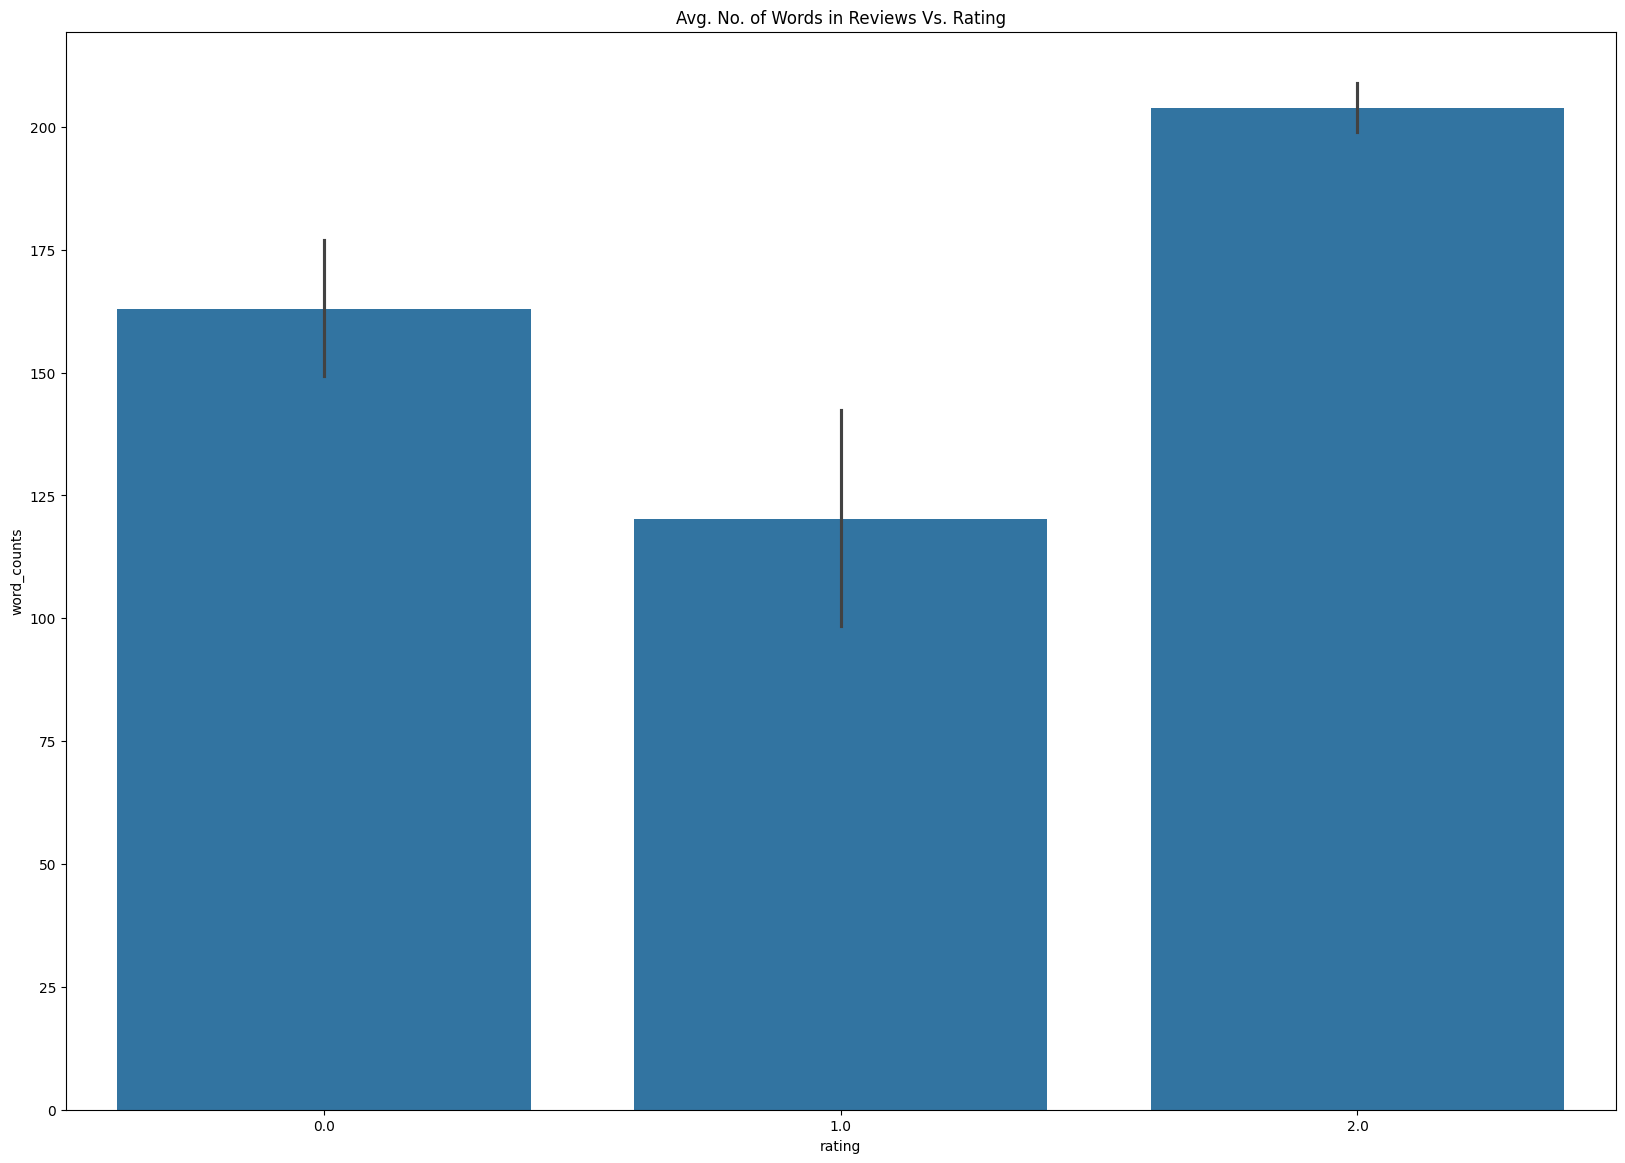

In [ ]:
plt.figure(figsize=(20,14))
sns.barplot(x='rating', y='word_counts', data=df_data)
plt.title('Avg. No. of Words in Reviews Vs. Rating')

From the above plot we can see that Avg. No. of Words in Positive Reviews more than the Avg. No. of Words in Neutral and Negative Reviews. In addition, Avg. No. of Words in Negative Reviews more than the Avg. No. of Words in Neutral Reviews

#4. Splitting The Data into Train & Test Set

In [ ]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(df_data, test_size=0.2)

In [ ]:
# Print distribution of classes (ratings) in training set
print("Training set class distribution:")
print(train['rating'].value_counts())

# Print distribution of classes (ratings) in test set
print("Test set class distribution:")
print(test['rating'].value_counts())

Training set class distribution:
rating
2.0    3305
0.0     391
1.0      72
Name: count, dtype: int64
Test set class distribution:
rating
2.0    847
0.0     77
1.0     18
Name: count, dtype: int64


In [ ]:
# Displaying the Shape of Training Set
print(train.shape)
# Displaying the Shape of Test Set
print(test.shape)

(3768, 6)
(942, 6)


#5. Data Cleaning

Importing the NLTK Tools

In [ ]:
import nltk
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('punkt')
from nltk.corpus import stopwords
STOPWORDS=set(stopwords.words('english'))
from nltk.tokenize import word_tokenize
import re

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


Importing other Necessary Libraries

In [ ]:
!pip3 install inflect
import inflect
p = inflect.engine()
from nltk.stem import WordNetLemmatizer
import re
from nltk.tokenize import word_tokenize
import gensim
import string

Defining a Text-Preprocessing Function

In [ ]:
def text_Preprocessing(reviews):
    def remove_emoji(text):
        emoji_pattern = re.compile("["
                               u"\U0001F600-\U0001F64F"
                               u"\U0001F300-\U0001F5FF"
                               u"\U0001F680-\U0001F6FF"
                               u"\U0001F1E0-\U0001F1FF"
                               u"\U00002702-\U000027B0"
                               u"\U000024C2-\U0001F251"
                               "]+", flags=re.UNICODE)
        return emoji_pattern.sub(r'', text)

    reviews = [text.lower() for text in reviews]                  # converting the entire text in the reviews to lowercase
    reviews = [re.sub(r'\S+@\S+', '', text) for text in reviews]  # removing emails from reviews
    reviews = [re.sub(r'\d+', '', text) for text in reviews]      # removing digits from the reviews
    reviews = [re.sub(r'[^\w\s]', '', text) for text in reviews]  # removing all the alphanumeric values from the reviews
    reviews = [text.strip() for text in reviews]                  # removing extra spaces from the reviews
    reviews = [remove_emoji(text) for text in reviews]            # removing emojis from reviews

    stop_words = set(stopwords.words('english'))                 # defining a set containing all the stopwords of english

    cleaned_reviews = []
    for review in reviews:
        tokens = [word for word in word_tokenize(review) if not word in stop_words]  # creating tokens for all different words present in the reviews
        cleaned_reviews.append(" ".join(tokens))

    lemmatizer = WordNetLemmatizer()
    lem_reviews = []
    for review in cleaned_reviews:
        lem_reviews.append(" ".join(list(map(lemmatizer.lemmatize, word_tokenize(review)))))  # lemmatizing the tokens to their root forms

    return lem_reviews

Preprocessing Train and Test Reviews

In [ ]:
t=train['review_text']
train['review_text']=text_Preprocessing(t)

In [ ]:
f=test['review_text']
test['review_text']=text_Preprocessing(f)

Words Counts after Preprocessing

In [ ]:
train['word_counts_after_preprocess']=train['review_text'].apply(lambda x: len(str(x.split())))
test['word_counts_after_preprocess']=test['review_text'].apply(lambda x: len(str(x.split())))

In [ ]:
train.head()

,product_name,product_type,rating,title,review_text,word_counts,word_counts_after_preprocess
3304,Coriander Powder,ground spices,2.0,Great colour and texture..,suitable well goal pure fresh come back,121,61
2796,Hing Powder,ground spices,2.0,Amazing!,super product lovely always packaging amazing ...,123,104
802,Dried Garlic Powder,ground spices,2.0,Amazing packaging and flavour,product convenient use flavour amazing got yes...,156,95
1,Smoky Tandoori Masala Spice Mix,indian spices,2.0,Tandoori masala,excellent veggie tofu paneerlove glass bottle,88,64
1516,Zesty Chilli Lime Seasoning,international seasoning,2.0,Finally found something...,im always go yum chilli lime seasoning permane...,224,119


In [ ]:
test.head()

,product_name,product_type,rating,title,review_text,word_counts,word_counts_after_preprocess
4298,Hing Powder,ground spices,2.0,SUPER QUALITY of hing!!,great nice cook flavour great quality,87,56
1608,Dried Garlic Powder,ground spices,2.0,Real taste,garlic taste garlicthis pure powder real,72,59
3280,Bombay Sandwich Masala,indian spices,2.0,Liked the reusable glass jar packaging,loved packaging bombay sandwich masala along t...,412,269
521,American Barbeque Spice Rub,international seasoning,2.0,Good purchase,grill rub nice lend delicious flavor dish adde...,515,287
3039,American Barbeque Spice Rub,international seasoning,2.0,Super flavours!!,incredible seasoning super saveurs give expect...,317,185


In [ ]:
l=[10,20,30,40,50,60,70,80,90,100]
for ele in l:
  print("{} percentile of counts is {}".format(ele,np.percentile(train['word_counts_after_preprocess'],ele)))

10 percentile of counts is 29.0
20 percentile of counts is 50.0
30 percentile of counts is 67.09999999999991
40 percentile of counts is 86.80000000000018
50 percentile of counts is 108.0
60 percentile of counts is 128.0
70 percentile of counts is 153.0
80 percentile of counts is 190.0
90 percentile of counts is 250.0
100 percentile of counts is 1121.0


In [ ]:
l=[10,20,30,40,50,60,70,80,90,100]
for ele in l:
  print("{} percentile of counts is {}".format(ele,np.percentile(test['word_counts_after_preprocess'],ele)))

10 percentile of counts is 31.0
20 percentile of counts is 50.0
30 percentile of counts is 66.30000000000001
40 percentile of counts is 84.40000000000003
50 percentile of counts is 107.0
60 percentile of counts is 124.0
70 percentile of counts is 150.0
80 percentile of counts is 186.80000000000007
90 percentile of counts is 233.79999999999995
100 percentile of counts is 1094.0


#6. Defining a LSTM Model

In [ ]:
y_train = train['rating']
X_train = train
X_train.drop('rating', axis=1, inplace=True)

y_test = test['rating']
X_test = test
X_test.drop('rating', axis=1, inplace=True)

Tokenization

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer(num_words=2000)
tokenizer.fit_on_texts(X_train["review_text"])

X_train['text_tok'] = tokenizer.texts_to_sequences(X_train['review_text'])
X_test['text_tok'] = tokenizer.texts_to_sequences(X_test['review_text'])

In [ ]:
X_train.head()

,product_name,product_type,title,review_text,word_counts,word_counts_after_preprocess,text_tok
3304,Coriander Powder,ground spices,Great colour and texture..,suitable well goal pure fresh come back,121,61,"[33, 65, 24, 104, 264]"
2796,Hing Powder,ground spices,Amazing!,super product lovely always packaging amazing ...,123,104,"[61, 3, 419, 136, 34, 23, 6, 136, 136, 291]"
802,Dried Garlic Powder,ground spices,Amazing packaging and flavour,product convenient use flavour amazing got yes...,156,95,"[3, 231, 10, 6, 23, 167, 1107, 1458, 324]"
1,Smoky Tandoori Masala Spice Mix,indian spices,Tandoori masala,excellent veggie tofu paneerlove glass bottle,88,64,"[51, 196, 684, 1823, 98, 40]"
1516,Zesty Chilli Lime Seasoning,international seasoning,Finally found something...,im always go yum chilli lime seasoning permane...,224,119,"[173, 136, 58, 125, 46, 52, 8, 1108, 1459, 110..."


Padding and truncating

In [ ]:
from tensorflow.keras.preprocessing import sequence
max_review_length=50
X_train_pad = sequence.pad_sequences(X_train['text_tok'].values, maxlen=max_review_length, padding='post')
X_test_pad = sequence.pad_sequences(X_test['text_tok'].values, maxlen=max_review_length, padding='post')

In [ ]:
X_train_pad

array([[ 33,  65,  24, ...,   0,   0,   0],
       [ 61,   3, 419, ...,   0,   0,   0],
       [  3, 231,  10, ...,   0,   0,   0],
       ...,
       [ 27, 137,   8, ...,   0,   0,   0],
       [ 48,  92,  93, ...,   0,   0,   0],
       [110, 256,   7, ...,   0,   0,   0]], dtype=int32)

Using Glove Vectors

In [ ]:
import tensorflow as tf
glove_file = '/content/drive/MyDrive/Crista_Spices/Glove_Vectors.txt'
glove = {}
with open(glove_file, 'r', encoding='utf-8') as f:
    for line in f:
        parts = line.split()
        word = parts[0]
        vector = [float(val) for val in parts[1:]]
        glove[word] = vector

glove_words = set(glove.keys())

In [ ]:
from numpy import zeros
max_vocabulary = len(tokenizer.word_index)
embedding_matrix = zeros((max_vocabulary+1, 300))
for word, i in tokenizer.word_index.items():
  if word in glove_words:
    embedding_vector = glove[word]
    embedding_matrix[i] = embedding_vector

In [ ]:
from tensorflow.python.keras.utils import np_utils
X_train = X_train_pad
X_test = X_test_pad
Y_train = y_train
Y_test = y_test

In [ ]:
from tensorflow.keras.layers import Dense, Input, Dropout, Flatten, LSTM, Bidirectional
from tensorflow.keras.regularizers import l2
from tensorflow.keras.layers import Embedding
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

review_input = Input(shape=(50,), name='review_input')
X = Embedding(output_dim=300, input_dim=max_vocabulary+1, input_length=50, weights=[embedding_matrix], trainable=False)(review_input)
X = Bidirectional(LSTM(100, return_sequences=True))(X)
X = Dropout(0.5)(X)
X = Bidirectional(LSTM(100))(X)
X = Dropout(0.5)(X)
X = Dense(64, activation="relu", kernel_initializer="he_normal", kernel_regularizer=l2(0.01))(X)
X = Dropout(0.5)(X)
X = Dense(8, activation="relu", kernel_initializer="he_normal", kernel_regularizer=l2(0.01))(X)
X = Dropout(0.5)(X)
output = Dense(3, activation='softmax', name='output')(X)

model = Model(inputs=[review_input], outputs=[output])

# Print model summary
print(model.summary())

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 review_input (InputLayer)   [(None, 50)]              0         
                                                                 
 embedding_1 (Embedding)     (None, 50, 300)           809400    
                                                                 
 bidirectional_1 (Bidirecti  (None, 50, 200)           320800    
 onal)                                                           
                                                                 
 dropout_1 (Dropout)         (None, 50, 200)           0         
                                                                 
 bidirectional_2 (Bidirecti  (None, 200)               240800    
 onal)                                                           
                                                                 
 dropout_2 (Dropout)         (None, 200)               0   

Plotting the Model

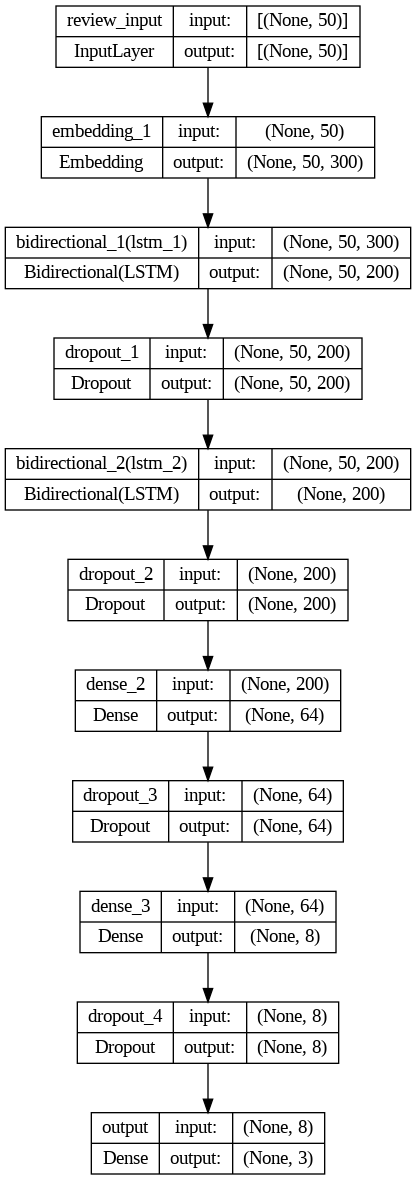

In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(model, show_shapes=True, show_layer_names=True)

#7. Training The Model

In [ ]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Callback for early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Callback for reducing learning rate
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=2, min_lr=0.00001)

# Fit the model
history = model.fit(X_train, Y_train, batch_size=32, epochs=20, verbose=1, validation_data=(X_test, Y_test),
                    callbacks=[early_stopping, reduce_lr])

Epoch 1/20
118/118 [==============================] - 43s 291ms/step - loss: 1.4573 - accuracy: 0.8458 - val_loss: 0.6879 - val_accuracy: 0.9352 - lr: 0.0010
Epoch 2/20
118/118 [==============================] - 35s 300ms/step - loss: 0.6546 - accuracy: 0.9111 - val_loss: 0.3602 - val_accuracy: 0.9501 - lr: 0.0010
Epoch 3/20
118/118 [==============================] - 33s 281ms/step - loss: 0.4406 - accuracy: 0.9350 - val_loss: 0.2555 - val_accuracy: 0.9512 - lr: 0.0010
Epoch 4/20
118/118 [==============================] - 32s 275ms/step - loss: 0.3384 - accuracy: 0.9453 - val_loss: 0.2203 - val_accuracy: 0.9533 - lr: 0.0010
Epoch 5/20
118/118 [==============================] - 33s 279ms/step - loss: 0.2928 - accuracy: 0.9554 - val_loss: 0.1917 - val_accuracy: 0.9597 - lr: 0.0010
Epoch 6/20
118/118 [==============================] - 33s 279ms/step - loss: 0.2880 - accuracy: 0.9464 - val_loss: 0.1897 - val_accuracy: 0.9490 - lr: 0.0010
Epoch 7/20
118/118 [==============================] 

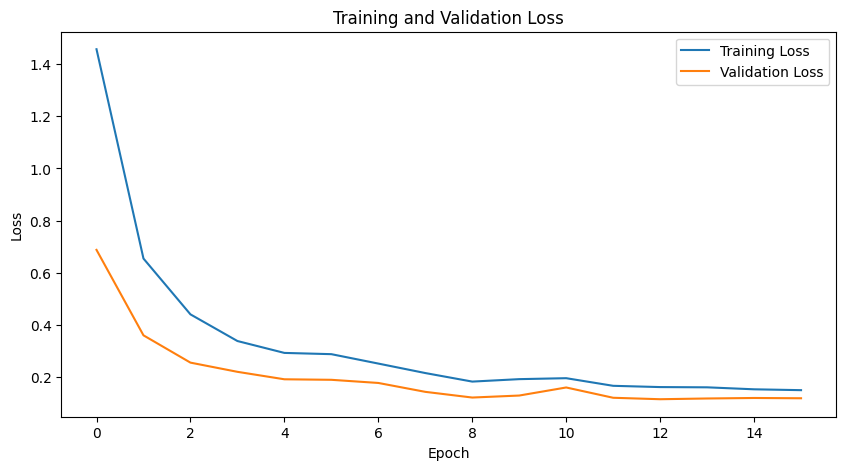

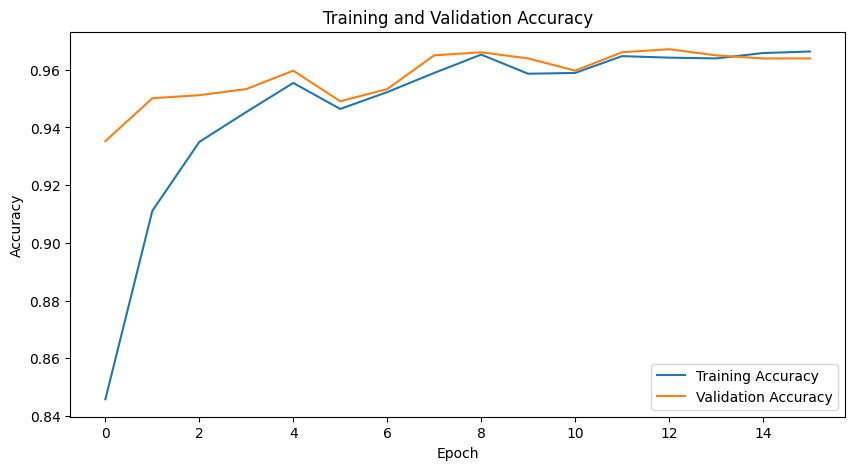

In [ ]:
import matplotlib.pyplot as plt

# Get the loss values from the training history
loss = history.history['loss']
val_loss = history.history['val_loss']

# Get the accuracy values from the training history
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

# Plot the loss function
plt.figure(figsize=(10, 5))
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot the accuracy
plt.figure(figsize=(10, 5))
plt.plot(accuracy, label='Training Accuracy')
plt.plot(val_accuracy, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

Saving the Model

In [ ]:
# Save the model in .h5 format
saved_model_path = "/content/drive/MyDrive/Crista_Spices/CristaSpices_ReviewsModel.h5"
model.save(saved_model_path)

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
pip install tensorflowjs

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.1/89.1 kB 2.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.5/15.5 MB 33.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.0/53.0 kB 6.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 589.8/589.8 MB 1.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 68.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.2/9.2 MB 85.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.3/5.3 MB 84.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 81.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 74.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 66.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 311.2/311.2 kB 25.3 MB/s eta 0:00:00
  Attempting uninstall: packaging
    Found existing installation: packaging 24.0
    Uninstalling packaging-24.0:
     

In [ ]:
# Use the tensorflow.js converter to convert the saved Keras model into JSON format
!tensorflowjs_converter --input_format=keras {saved_model_path} /content/tfjs_model/

2024-06-01 20:43:50.755911: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [ ]:
import os
if os.path.exists("/content/tfjs_model/model.json"):
    print("Conversion successful, model.json found")
else:
    print("Conversion failed, model.json not found")

Conversion successful, model.json found


In [ ]:
!zip -r "/content/drive/My Drive/Crista_Spices/CristaSpices_ReviewsModel.zip" "/content/tfjs_model/"

  adding: content/tfjs_model/ (stored 0%)
  adding: content/tfjs_model/group1-shard1of2.bin (deflated 14%)
  adding: content/tfjs_model/model.json (deflated 84%)
  adding: content/tfjs_model/group1-shard2of2.bin (deflated 41%)


#8. Predicting Results

In [ ]:
predict = model.predict(X_test)
predictions = np.argmax(predict, axis=1)
predictions

30/30 [==============================] - 9s 195ms/step


array([2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 0, 2, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 2, 0, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0,
       0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 2, 2, 2, 0,
       2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 0,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,

Accuracy of Test Set

In [ ]:
from sklearn.metrics import accuracy_score
Acc = accuracy_score(predictions, Y_test)
print("The Accuracy of the Model on test set is : {}".format(Acc))

The Accuracy of the Model on test set is : 0.9670912951167728


Confusion Matrix for Test Set

The Confusion Matrix for the test set is :


<Axes: >

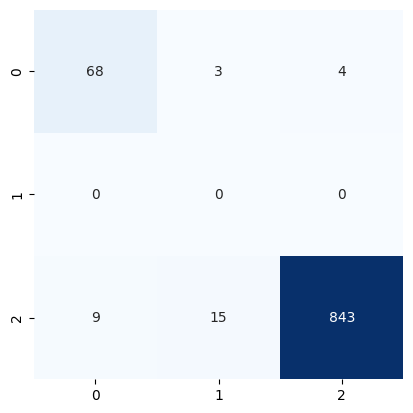

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(predictions, Y_test)
print("The Confusion Matrix for the test set is :")
sns.heatmap(cm, square=True, annot=True, cmap='Blues', fmt='d', cbar=False)

In [ ]:
predicted_positive = cm[2, 2] + cm[0, 2] + cm[1, 2]
predicted_neutral = cm[1, 1] + cm[0, 1] + cm[2, 1]
predicted_negative = cm[0, 0] + cm[1, 0] + cm[2, 0]
print(f"Predicted Positive: {predicted_positive}")
print(f"Predicted Neutral: {predicted_neutral}")
print(f"Predicted Negative: {predicted_negative}")

actual_positive_reviews = cm[2, 0] + cm[2, 1] + cm[2, 2]
actual_neutral_reviews = cm[1, 0] + cm[1, 1] + cm[1, 2]
actual_negative_reviews = cm[0, 0] + cm[0, 1] + cm[0, 2]
print(f"Actual Positive Reviews: {actual_positive_reviews}")
print(f"Actual Neutral Reviews: {actual_neutral_reviews}")
print(f"Actual Negative Reviews: {actual_negative_reviews}")

Predicted Positive: 847
Predicted Neutral: 18
Predicted Negative: 77
Actual Positive Reviews: 867
Actual Neutral Reviews: 0
Actual Negative Reviews: 75


In [ ]:
from sklearn.metrics import classification_report

report = classification_report(predictions, Y_test, target_names=['Negative', 'Neutral', 'Positive'])
print("Classification Report:\n", report)


Classification Report:
               precision    recall  f1-score   support

    Negative       0.88      0.91      0.89        75
     Neutral       0.00      0.00      0.00         0
    Positive       1.00      0.97      0.98       867

    accuracy                           0.97       942
   macro avg       0.63      0.63      0.63       942
weighted avg       0.99      0.97      0.98       942



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
